In [115]:
import cv2
import numpy as np
import glob
import os
from skimage import io
from skimage.feature import hog
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
# get path image from computer
path_train = glob.glob("CarData/CarData/TrainImages/*.pgm")
path_test = glob.glob("CarData/CarData/TestImages/*.pgm")

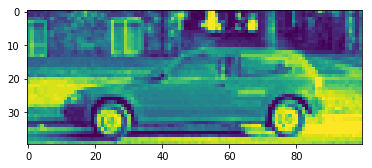

In [117]:
# plot some image
im = io.imread(path_train[900])
plt.imshow(im)

In [118]:
im.shape

(40, 100)

In [119]:
# create feature hog
def hog_feature(image):
    feat = hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2))
    return feat

In [120]:
X_train = []
y_train = []
for image_path in path_train :
    im = io.imread(image_path)
    feature = hog_feature(im)
    X_train.append(feature)
    name_image = os.path.split(image_path)[1]
    if name_image.startswith("neg") == 1 :
        y_train.append(0)
    else :
        y_train.append(1)

C:\Users\Thor\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [121]:
X_test = []
y_test = []
for image_path in path_test :
    im = io.imread(image_path)
    feature = hog_feature(im)
    X_test.append(feature)
    name_image = os.path.split(image_path)[1]
    if name_image.startswith("neg") == 1 :
        y_test.append(0)
    else :
        y_test.append(1)

C:\Users\Thor\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [122]:
# Train model with SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [123]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)

(1050, 1584)


In [124]:
model = LinearSVC()
model.fit(X_train,y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [130]:
y_predict = model.predict(X_train[:1])

In [131]:
y_predict

array([0])

In [86]:
print(accuracy_score(y_train,y_predict))

1.0


In [87]:
def sliding_window(image, window_size, step_size):
    for y in range(0, image.shape[0]-window_size[0], step_size[1]):
        for x in range(0, image.shape[1]-window_size[1], step_size[0]):
            roi = image[y:y + window_size[1], x:x + window_size[0]]
            yield (x, y,roi )

In [160]:
image = cv2.imread("test.png")
image.shape

(146, 229, 3)

In [161]:
min_wdw_sz = (100, 40)
step_size = (10, 10)
im_list = []
for (x,y,roi) in sliding_window(image,min_wdw_sz,step_size):
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    if roi.shape == (40,100):
        print("yes")
        feat = hog_feature(roi)
        y_pre = model.predict(feat.reshape((1, 1584)))
        print(y_pre)
        if y_pre == 1 :
            im_list.append((x,y,roi))

yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]


C:\Users\Thor\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
yes
[0]
